In [79]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

now = 2020-09-28 23:16:05.431943
date and time = 28/09/2020 23:16:05


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns 
from time import time
import matplotlib.pyplot as plt 
from sklearn.utils import resample
import matplotlib.ticker as ticker
%matplotlib inline 
from sklearn import model_selection
from sklearn.utils.extmath import density
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize
from nltk.corpus import stopwords
import warnings
from sklearn.utils import resample
from ast import literal_eval
import re
warnings.filterwarnings('ignore')
print('pandas:'+pd.__version__)
print('seaborn:'+sns.__version__)  

pandas:1.0.5
seaborn:0.10.1


In [81]:
##Classificadores

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

In [82]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importando os dados


In [83]:
movies = pd.read_csv('../../../dados/movielens/filmes_com_overview.csv')

In [89]:
# movies = movies['genres != (no genres listed)']:
movies.drop(movies[movies.genres == '(no genres listed)'].index, inplace=True)

In [90]:
movies['genres'].value_counts()

Drama                                           8869
Comedy                                          5422
Documentary                                     4573
Comedy|Drama                                    2338
Drama|Romance                                   2088
                                                ... 
Action|Crime|Mystery|Romance|Sci-Fi|Thriller       1
Crime|Mystery|War                                  1
Action|Horror|Sci-Fi|War                           1
Adventure|Animation|Children|Western               1
Animation|Documentary|Drama|Fantasy                1
Name: genres, Length: 1625, dtype: int64

In [91]:
movies.head(3)

,movieId,title,genres,overview
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...
2,3,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...


In [92]:
(movies['genres'].values == '').sum()  

0

In [93]:
movies.isna().sum() 

movieId     0
title       0
genres      0
overview    0
dtype: int64

In [94]:
# movies.drop(movies.columns[0], axis=1, inplace=True)
# movies.head(3)

# Classificação de Gêneros

## Preparação dos dados

### Tranformando a lista JSON de Gêneros em um array

In [95]:
movies['genres'] = movies.genres.apply(lambda x: x.split('|'))

In [96]:
movies.head(3)

,movieId,title,genres,overview
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]","Led by Woody, Andy's toys live happily in his ..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",When siblings Judy and Peter discover an encha...
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",A family wedding reignites the ancient feud be...


In [97]:
movies.genres.count

<bound method Series.count of 0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
                               ...                        
60783                            [Action, Comedy, Romance]
60784                                              [Drama]
60785                                        [Documentary]
60786                                      [Comedy, Drama]
60788                           [Action, Adventure, Drama]
Name: genres, Length: 56081, dtype: object>

In [98]:
movies.shape

(56081, 4)

### Tratamento de valores nulos

In [99]:
movies.isnull().sum()

movieId     0
title       0
genres      0
overview    0
dtype: int64

### Criação de 3 datasets para testes de algoritmos

In [100]:
title_df = movies[["overview","genres","title"]] #, "all_text"
# filmes_balanceados = df = df[df.line_race != 0]
# chi Fade to Black Kimi no Na o Yobu) (2008)         1
#  Battle Force (1978)                                1
# Gate the Movie: The Burden of Déjà vu (2013)        1
# epe&#351 title_df.copy(deep=True)

In [110]:
lst_col = 'genres'

filmes_balanceados2 = pd.DataFrame({
      col:np.repeat(filmes_balanceados[col].values, filmes_balanceados[lst_col].str.len())
      for col in filmes_balanceados.columns.drop(lst_col)}
    ).assign(**{
    lst_col:np.concatenate(filmes_balanceados[lst_col].values)})[filmes_balanceados.columns]

In [102]:
title_df.head(3)

,overview,genres,title
0,"Led by Woody, Andy's toys live happily in his ...","[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story (1995)
1,When siblings Judy and Peter discover an encha...,"[Adventure, Children, Fantasy]",Jumanji (1995)
2,A family wedding reignites the ancient feud be...,"[Comedy, Romance]",Grumpier Old Men (1995)


In [104]:
title_df.shape 

(56081, 3)

In [111]:
filmes_balanceados2.tail(3)

,overview,genres,title
109800,Over two decade affair ended married man haunt...,Action,Women of Devil's Island (1962)
109801,Over two decade affair ended married man haunt...,Adventure,Women of Devil's Island (1962)
109802,Over two decade affair ended married man haunt...,Drama,Women of Devil's Island (1962)


,overview,genres,title
37498,Women struggle Shanghai brothel everything app...,chi Fade to Black Kimi no Na o Yobu) (2008),Bleach: Fade to Black (Bur&#299


In [108]:
# d=filmes_balanceados2[filmes_balanceados2['genres'] == ' Battle Force (1978)']
# d

,overview,genres,title
56518,John Mary sims city dweller hit hard financial...,Battle Force (1978),The Biggest Battle


In [112]:
filmes_balanceados2['genres'].value_counts()

Drama                                           25112
Comedy                                          16440
Thriller                                         8569
Romance                                          7602
Action                                           7242
Horror                                           5935
Documentary                                      5410
Crime                                            5215
(no genres listed)                               4708
Adventure                                        4054
Sci-Fi                                           3528
Mystery                                          2863
Children                                         2859
Animation                                        2824
Fantasy                                          2644
War                                              1832
Western                                          1378
Musical                                          1039
Film-Noir                   

In [114]:
filmes_balanceados2 = filmes_balanceados2[filmes_balanceados2['genres'] != 'chi Fade to Black Kimi no Na o Yobu) (2008)']
filmes_balanceados2 = filmes_balanceados2[filmes_balanceados2['genres'] != ' Battle Force (1978)']
filmes_balanceados2 = filmes_balanceados2[filmes_balanceados2['genres'] != 'epe&#351']
filmes_balanceados2 = filmes_balanceados2[filmes_balanceados2['genres'] != '(no genres listed)']
filmes_balanceados2 = filmes_balanceados2[filmes_balanceados2['genres'] != 'Gate the Movie: The Burden of Déjà vu (2013)']
filmes_balanceados2['genres'].value_counts()

Drama          25112
Comedy         16440
Thriller        8569
Romance         7602
Action          7242
Horror          5935
Documentary     5410
Crime           5215
Adventure       4054
Sci-Fi          3528
Mystery         2863
Children        2859
Animation       2824
Fantasy         2644
War             1832
Western         1378
Musical         1039
Film-Noir        352
IMAX             193
Name: genres, dtype: int64

#### Separando cada gênero em dataset diferente para poder fazer resample dos dados - Tratamento de classes desbalanceadas

In [115]:
df_Drama = filmes_balanceados2[filmes_balanceados2['genres']=='Drama']
df_Comedy  = filmes_balanceados2[filmes_balanceados2['genres']=='Comedy']
df_Thriller   = filmes_balanceados2[filmes_balanceados2['genres']=='Thriller']
df_Romance   = filmes_balanceados2[filmes_balanceados2['genres']=='Romance']
df_Action  = filmes_balanceados2[filmes_balanceados2['genres']=='Action']
df_Horror     = filmes_balanceados2[filmes_balanceados2['genres']=='Horror']
df_Documentary  = filmes_balanceados2[filmes_balanceados2['genres']=='Documentary']
df_Crime    = filmes_balanceados2[filmes_balanceados2['genres']=='Crime']
df_Adventure = filmes_balanceados2[filmes_balanceados2['genres']=='Adventure'] 
df_Mystery      = filmes_balanceados2[filmes_balanceados2['genres']=='Mystery'] 
df_Animation   = filmes_balanceados2[filmes_balanceados2['genres']=='Animation']
df_Fantasy    = filmes_balanceados2[filmes_balanceados2['genres']=='Fantasy'] 
df_War        = filmes_balanceados2[filmes_balanceados2['genres']=='War']
df_Western     = filmes_balanceados2[filmes_balanceados2['genres']=='Western']
df_Music         = filmes_balanceados2[filmes_balanceados2['genres']=='Musical']

df_Children           = filmes_balanceados2[filmes_balanceados2['genres']=='Children']
df_SciFi = filmes_balanceados2[filmes_balanceados2['genres']=='Sci-Fi']
df_FilmNoir           = filmes_balanceados2[filmes_balanceados2['genres']=='Film-Noir']
df_IMAX     = filmes_balanceados2[filmes_balanceados2['genres']=='IMAX']

 

In [116]:
df_Comedy  = resample(df_Comedy,
                      replace=True,
                      n_samples=25112,
                      random_state=0)
df_Thriller   = resample(df_Thriller,
                         replace=True,
                         n_samples=25112,
                         random_state=0)
df_Romance   = resample(df_Romance,
                        replace=True,
                        n_samples=25112,
                        random_state=0)
df_Action  = resample(df_Action,
                      replace=True,
                      n_samples=25112,
                      random_state=0)
df_Horror     = resample(df_Horror, 
                         replace=True,     
                         n_samples=25112,    
                         random_state=0)
df_Documentary= resample(df_Documentary, 
                         replace=True,
                         n_samples=25112,    
                         random_state=0)
df_Crime   = resample(df_Crime,
                      replace=True,     
                      n_samples=25112,    
                      random_state=0)
df_Adventure= resample(df_Adventure, 
                       replace=True,  
                       n_samples=25112,    
                       random_state=0)
df_Mystery      = resample(df_Mystery,
                           replace=True,     
                           n_samples=25112,   
                           random_state=0)
df_Animation  = resample(df_Animation, 
                         replace=True, 
                         n_samples=25112, 
                         random_state=0)
df_Fantasy   = resample(df_Fantasy, 
                                 replace=True,     
                                 n_samples=25112,    
                                 random_state=0) 

# df_Family          = resample(df_Family, 
#                               replace=True,
#                               n_samples=25112,  
#                               random_state=0)
df_War       = resample(df_War, 
                        replace=True,   
                        n_samples=25112,    
                        random_state=0)
df_Western    = resample(df_Western, 
                         replace=True,     
                         n_samples=25112,    
                         random_state=0)
df_Music      = resample(df_Music,
                         replace=True,  
                         n_samples=25112, 
                         random_state=0)  
df_Children    = resample(df_Children, 
                         replace=True, 
                         n_samples=25112,  
                         random_state=0) 
df_SciFi   = resample(df_SciFi, 
                        replace=True,
                        n_samples=25112,  
                        random_state=0)
df_FilmNoir   = resample(df_FilmNoir, 
                        replace=True,
                        n_samples=25112,  
                        random_state=0)


df_IMAX = resample(df_IMAX, 
                       replace=True, 
                       n_samples=25112,
                       random_state=0)

In [117]:
df_War.shape

(25112, 3)

In [118]:
df_upsampled = pd.concat([df_Drama, df_Comedy], axis=0 )
df_upsampled = pd.concat([df_upsampled, df_Thriller ]
                         )
df_upsampled = pd.concat([df_upsampled, df_Action ]
                         )
df_upsampled = pd.concat([df_upsampled, df_Adventure ]
                         )
df_upsampled = pd.concat([df_upsampled, df_Romance ]
                         )
df_upsampled = pd.concat([df_upsampled, df_Crime ]
                         )
df_upsampled = pd.concat([df_upsampled, df_SciFi ]
                         )
df_upsampled = pd.concat([df_upsampled, df_Horror ]
                         ) 
df_upsampled = pd.concat([df_upsampled, df_Fantasy ]
                         )
df_upsampled = pd.concat([df_upsampled, df_Mystery ]
                         )
df_upsampled = pd.concat([df_upsampled, df_Animation ]
                         )  
df_upsampled = pd.concat([df_upsampled, df_Music ]
                         )
df_upsampled = pd.concat([df_upsampled, df_War ]
                         )
df_upsampled = pd.concat([df_upsampled, df_Documentary ]
                         )
df_upsampled = pd.concat([df_upsampled, df_Western ]
                         )  
df_upsampled = pd.concat([df_upsampled, df_Children ]
                         )
df_upsampled = pd.concat([df_upsampled, df_FilmNoir ]
                         )
df_upsampled = pd.concat([df_upsampled, df_IMAX ]
                         )

In [119]:
df_upsampled.shape

(351568, 3)

In [120]:
df_upsampled.reset_index()

,index,overview,genres,title
0,11,Led Woody Andy toy live happily room Andy birt...,Drama,Waiting to Exhale (1995)
1,26,Cheated mistreated stepped woman holding breat...,Drama,"American President, The (1995)"
2,33,Just George Banks recovered daughter wedding r...,Drama,Nixon (1995)
3,38,Obsessive master thief Neil McCauley lead top ...,Drama,Casino (1995)
4,39,Obsessive master thief Neil McCauley lead top ...,Drama,Sense and Sensibility (1995)
...,...,...,...,...
351563,45293,After discovering dating guy three popular stu...,Western,Colorado (1940)
351564,94585,In 1945 group victorious American officer disc...,Western,Gone Are the Days (2018)
351565,52594,When radio love guru Dr Emma Lloyd convinces P...,Western,Kill Him! (1970)
351566,26770,The story three Pittsburgh widow meet every ye...,Western,"Duel at Silver Creek, The (1952)"


In [121]:
df_upsampled['genres'].value_counts()

Comedy         25112
Western        25112
Crime          25112
Musical        25112
Fantasy        25112
Documentary    25112
War            25112
Horror         25112
Romance        25112
Animation      25112
Mystery        25112
Action         25112
Thriller       25112
Drama          25112
Name: genres, dtype: int64

### Tranformando a string de gênero para um array

In [26]:
# filmes_balanceados2['genres'] = filmes_balanceados2['genres'].map(lambda x: x.split(','))
# filmes_balanceados2['genres'].head() 

In [27]:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [125]:
punctuation = """!()-[]{};:'"\, <>./?@#$%^&*_~"""

words = stopwords.words("english")
lemma = nltk.stem.WordNetLemmatizer()
def pre_process(text):
    text = str(text)
    remove_hyperlink = re.sub('http://\S+|https://\S+', '', text)
    for elements in remove_hyperlink:
        if elements in punctuation:
            remove_hyperlink = remove_hyperlink.replace(elements, " ")
    tokens = word_tokenize(remove_hyperlink)
    remove_words = [word for word in tokens if not word in words]
    text = [lemma.lemmatize(word) for word in remove_words]
    joined_words = " ".join(text)
    return joined_words

#### Preprocessamento para retirada de strings não úteis para o machine learning

In [126]:
 
title_df['overview'] = title_df['overview'].apply(pre_process) 
filmes_balanceados['overview'] = filmes_balanceados2['overview'].apply(pre_process)  
df_upsampled['overview'] = df_upsampled['overview'].apply(pre_process)  




In [127]:
filmes_balanceados2.head(3)

,overview,genres,title
0,Led Woody Andy toy live happily room Andy birt...,Adventure,Toy Story (1995)
1,Led Woody Andy toy live happily room Andy birt...,Animation,Toy Story (1995)
2,Led Woody Andy toy live happily room Andy birt...,Children,Toy Story (1995)


#### Criação de matriz binária para conferencia de resultados 

#### Criação da matriz de termos x frequencia - Somente  overview 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html

TfidfVectorizer -> Convert a collection of raw documents to a matrix of TF-IDF features.

In [128]:
df_upsampled['genres'] = df_upsampled['genres'].map(lambda x: x.split(','))
df_upsampled['genres'].head() 
filmes_balanceados2['genres'] = filmes_balanceados2['genres'].map(lambda x: x.split(','))
filmes_balanceados2['genres'].head() 
# from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
# multilabel_binarizer.fit(title_df['genres'])

# transform target variable
y = multilabel_binarizer.fit_transform( title_df['genres']  )

# transform target variable
multilabel_binarizer2 = MultiLabelBinarizer()
y_b = multilabel_binarizer2.fit_transform(  filmes_balanceados2['genres']    )

# y_b = multilabel_binarizer2.transform( filmes_balanceados2['genres'].unique()   )

# transform target variable
multilabel_binarizer3 = MultiLabelBinarizer()
y_b2 =multilabel_binarizer3.fit_transform(df_upsampled['genres'])

# y_b2 = multilabel_binarizer3.transform([df_upsampled['genres'].to_list()])



In [129]:
title_df['genres']

0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
                               ...                        
60783                            [Action, Comedy, Romance]
60784                                              [Drama]
60785                                        [Documentary]
60786                                      [Comedy, Drama]
60788                           [Action, Adventure, Drama]
Name: genres, Length: 56081, dtype: object

In [130]:
multilabel_binarizer2.classes_

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

In [131]:
multilabel_binarizer3.classes_

array(['Action', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Horror', 'Musical', 'Mystery', 'Romance', 'Thriller',
       'War', 'Western'], dtype=object)

In [132]:
multilabel_binarizer2.inverse_transform(y_b)

[('Adventure',),
 ('Animation',),
 ('Children',),
 ('Comedy',),
 ('Fantasy',),
 ('Adventure',),
 ('Children',),
 ('Fantasy',),
 ('Comedy',),
 ('Romance',),
 ('Comedy',),
 ('Drama',),
 ('Romance',),
 ('Comedy',),
 ('Action',),
 ('Crime',),
 ('Thriller',),
 ('Comedy',),
 ('Romance',),
 ('Adventure',),
 ('Children',),
 ('Action',),
 ('Action',),
 ('Adventure',),
 ('Thriller',),
 ('Comedy',),
 ('Drama',),
 ('Romance',),
 ('Comedy',),
 ('Horror',),
 ('Adventure',),
 ('Animation',),
 ('Children',),
 ('Drama',),
 ('Action',),
 ('Adventure',),
 ('Romance',),
 ('Crime',),
 ('Drama',),
 ('Drama',),
 ('Romance',),
 ('Comedy',),
 ('Comedy',),
 ('Action',),
 ('Comedy',),
 ('Crime',),
 ('Drama',),
 ('Thriller',),
 ('Comedy',),
 ('Crime',),
 ('Thriller',),
 ('Crime',),
 ('Drama',),
 ('Horror',),
 ('Mystery',),
 ('Thriller',),
 ('Action',),
 ('Crime',),
 ('Thriller',),
 ('Drama',),
 ('Sci-Fi',),
 ('Drama',),
 ('Romance',),
 ('Drama',),
 ('Children',),
 ('Drama',),
 ('Drama',),
 ('Romance',),
 ('Advent

In [133]:
y_b2.shape

(351568, 14)

#### Criação da TF-IDF para cada conjunto - Somente  overview 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

TfidfVectorizer -> Convert a collection of raw documents to a matrix of TF-IDF features.

In [134]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, max_features=5000)
tfidf_vectorizer2 = TfidfVectorizer(max_df=0.7, max_features=5000)
tfidf_vectorizer3 = TfidfVectorizer(max_df=0.7, max_features=5000)
# from sklearn import model_selection
xtrain, xval, ytrain, yval = model_selection.train_test_split(title_df['overview'], y, test_size=0.2, random_state=512)
xtrainb, xvalb, ytrainb, yvalb = model_selection.train_test_split(filmes_balanceados2['overview'], y_b, test_size=0.2, random_state=512)
xtrainb2, xvalb2, ytrainb2, yvalb2 = model_selection.train_test_split(df_upsampled['overview'], y_b2, test_size=0.2, random_state=512)

In [135]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

xtrain_tfidfb = tfidf_vectorizer2.fit_transform(xtrainb)
xval_tfidfb = tfidf_vectorizer2.transform(xvalb)

xtrain_tfidfb2 = tfidf_vectorizer3.fit_transform(xtrainb2)
xval_tfidfb2 = tfidf_vectorizer3.transform(xvalb2)

In [136]:
 multilabel_binarizer2.inverse_transform(y_b)

[('Adventure',),
 ('Animation',),
 ('Children',),
 ('Comedy',),
 ('Fantasy',),
 ('Adventure',),
 ('Children',),
 ('Fantasy',),
 ('Comedy',),
 ('Romance',),
 ('Comedy',),
 ('Drama',),
 ('Romance',),
 ('Comedy',),
 ('Action',),
 ('Crime',),
 ('Thriller',),
 ('Comedy',),
 ('Romance',),
 ('Adventure',),
 ('Children',),
 ('Action',),
 ('Action',),
 ('Adventure',),
 ('Thriller',),
 ('Comedy',),
 ('Drama',),
 ('Romance',),
 ('Comedy',),
 ('Horror',),
 ('Adventure',),
 ('Animation',),
 ('Children',),
 ('Drama',),
 ('Action',),
 ('Adventure',),
 ('Romance',),
 ('Crime',),
 ('Drama',),
 ('Drama',),
 ('Romance',),
 ('Comedy',),
 ('Comedy',),
 ('Action',),
 ('Comedy',),
 ('Crime',),
 ('Drama',),
 ('Thriller',),
 ('Comedy',),
 ('Crime',),
 ('Thriller',),
 ('Crime',),
 ('Drama',),
 ('Horror',),
 ('Mystery',),
 ('Thriller',),
 ('Action',),
 ('Crime',),
 ('Thriller',),
 ('Drama',),
 ('Sci-Fi',),
 ('Drama',),
 ('Romance',),
 ('Drama',),
 ('Children',),
 ('Drama',),
 ('Drama',),
 ('Romance',),
 ('Advent

In [137]:
# def benchmark(clf, xtrain, xval, ytrain, yval):
#     print('_' * 80)
#     print("Training: ")
#     print(clf)
#     t0 = time()
#     clf.fit(xtrain_tfidf, ytrain)
#     train_time = time() - t0
#     print("train time: %0.3fs" % train_time)

#     t0 = time()
#     pred = clf.predict(xtrain_tfidf)
#     test_time = time() - t0
#     print("test time:  %0.3fs" % test_time)

#     score = metrics.accuracy_score(yval, pred)
#     print("accuracy:   %0.3f" % score)

#     if hasattr(clf, 'coef_'):
#         print("dimensionality: %d" % clf.coef_.shape[1])
#         print("density: %f" % density(clf.coef_))

#         if opts.print_top10 and feature_names is not None:
#             print("top 10 keywords per class:")
#             for i, label in enumerate(target_names):
#                 top10 = np.argsort(clf.coef_[i])[-10:]
#                 print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
#         print()

#     if opts.print_report:
#         print("classification report:")
#         print(metrics.classification_report(yval, pred,
#                                             target_names=target_names))

#     if opts.print_cm:
#         print("confusion matrix:")
#         print(metrics.confusion_matrix(yval, pred))

#     print()
#     clf_descr = str(clf).split('(')[0]
#     return clf_descr, score, train_time, test_time

In [138]:
import sqlite3
from sqlite3 import Error
import uuid
id_transacao = dt_string#str(uuid.uuid4())
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

def save_metrics(conn, project):
    """
    Create a new project into the projects table
    :param conn:
    :param project:
    :return: project id
    """
    sql = ''' INSERT INTO metrics( classificador, score_f1,
    precision,
    train_time,
    test_time,
    transacao)
    VALUES(?,?,?,?,?,?) '''
    cur = conn.cursor()
    cur.execute(sql, project)
    conn.commit()
    return cur.lastrowid

def salvar_dado(valor):
    database = r"../data/metricsDB.sqlite"
    print (id)
    # create a database connection
    conn = create_connection(database)
    with conn:
        # create a new project
#         linha = ['SGD Classifier',  0.4503092535879421,  1.9019618034362793,  0.012923479080200195, id]
#         metrica = ('Cool App with SQLite & Python', '2015-01-01', '2015-01-30');
        valor.append(id_transacao)
        print(valor)
        metrica = save_metrics( conn,valor) 
    print (id)
        

### Aplicação da Regressão Logistica

In [139]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/model_evaluation.html
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics    
    
# Binary Relevance

from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score,average_precision_score,brier_score_loss
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from sklearn.metrics import multilabel_confusion_matrix, ndcg_score, precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support, balanced_accuracy_score
# from sklearn.metrics import 


# accuracy_score 
# See the Regression metrics section of the user guide for further details.

# metrics.explained_variance_score(y_true, …)

# Explained variance regression score function

# metrics.max_error(y_true, y_pred)

# max_error metric calculates the maximum residual error.

# metrics.mean_absolute_error(y_true, y_pred, *)

# Mean absolute error regression loss

# metrics.mean_squared_error(y_true, y_pred, *)

# Mean squared error regression loss

# metrics.mean_squared_log_error(y_true, y_pred, *)

# Mean squared logarithmic error regression loss

# metrics.median_absolute_error(y_true, y_pred, *)

# Median absolute error regression loss

# metrics.r2_score(y_true, y_pred, *[, …])

# R^2 (coefficient of determination) regression score function.

# metrics.mean_poisson_deviance(y_true, y_pred, *)

# Mean Poisson deviance regression loss.

# metrics.mean_gamma_deviance(y_true, y_pred, *)

# Mean Gamma deviance regression loss.

# metrics.mean_tweedie_deviance(y_true, y_pred, *)

# Mean Tweedie deviance regression loss. 
# See the Multilabel ranking metrics section of the user guide for further details.

# metrics.coverage_error(y_true, y_score, *[, …])

# Coverage error measure

# metrics.label_ranking_average_precision_score(…)

# Compute ranking-based average precision

# metrics.label_ranking_loss(y_true, y_score, *)

# Compute Ranking loss measure

In [140]:

from sklearn.linear_model import LogisticRegression,SGDClassifier
#Sem tratamento de classes desbalanceadas
# lr = LogisticRegression()
# clf = OneVsRestClassifier(lr)

# #Algoritmo penalizando as classes maiores
# lr2 = LogisticRegression(class_weight = 'balanced')
# clf2 = OneVsRestClassifier(lr2)

# #Aqui as classes foram upsampled

# lr4 = SGDClassifier(shuffle=True, loss='log', penalty="elasticnet", class_weight = 'balanced')
# clf4 = OneVsRestClassifier(lr4)


In [141]:
results = []
resultsLogisticRegression = []

In [142]:
multilabel_binarizer3.classes_ 

array(['Action', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Horror', 'Musical', 'Mystery', 'Romance', 'Thriller',
       'War', 'Western'], dtype=object)

## LogisticRegression - Tratamento Total - upsampled


In [143]:
  
lr  = LogisticRegression(class_weight = 'balanced')
clf  = OneVsRestClassifier(lr )
classes=multilabel_binarizer3.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb2, ytrainb2) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb2)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb2, pred, average="micro")
precision = precision_score(yvalb2, pred, average='micro')
print("accuracy:   %0.3f" % score)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb2, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens-LogisticRegression-upsampled'#str(clf).split('(')[0]

    
results.append([clf_descr, score,precision, train_time, test_time])  
resultsLogisticRegression.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced'))
Treino: 85.969s
testes:  0.182s
accuracy:   0.294

Accuracy: 0.01

Micro Precision: 0.18
Micro Recall: 0.76
Micro F1-score: 0.29

Macro Precision: 0.20
Macro Recall: 0.76
Macro F1-score: 0.32

Weighted Precision: 0.20
Weighted Recall: 0.76
Weighted F1-score: 0.32
Relatório de Classificação:
              precision    recall  f1-score   support

      Action       0.14      0.66      0.23      5086
   Animation       0.25      0.89      0.39      5025
      Comedy       0.11      0.57      0.18      4965
       Crime       0.16      0.72      0.26      5004
 Documentary       0.18      0.75      0.29      4987
       Drama       0.08      0.46      0.14      5066
     Fantasy       0.22      0.87      0.36      5016
      Horror       0.15      0.71      0.25      4969
     Musical  

## LogisticRegression - Tratamento Parcial


In [144]:
  
lr  = LogisticRegression(class_weight = 'balanced')
clf  = OneVsRestClassifier(lr )
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb )
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb , pred, average="micro")
precision = precision_score(yvalb, pred, average='micro')
print("accuracy:   %0.3f" % score)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens-LogisticRegression-Parcial'#str(clf).split('(')[0]

    
results.append([clf_descr, score,precision, train_time, test_time]) 
resultsLogisticRegression.append([clf_descr, score,precision, train_time, test_time])    
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced'))
Treino: 24.343s
testes:  0.055s
accuracy:   0.119

Accuracy: 0.00

Micro Precision: 0.07
Micro Recall: 0.36
Micro F1-score: 0.12

Macro Precision: 0.05
Macro Recall: 0.28
Macro F1-score: 0.09

Weighted Precision: 0.11
Weighted Recall: 0.36
Weighted F1-score: 0.16
Relatório de Classificação:
              precision    recall  f1-score   support

      Action       0.06      0.34      0.11      1412
   Adventure       0.04      0.27      0.06       844
   Animation       0.04      0.36      0.08       568
    Children       0.03      0.26      0.06       614
      Comedy       0.15      0.42      0.22      3255
       Crime       0.04      0.30      0.07      1006
 Documentary       0.06      0.35      0.10      1097
       Drama       0.23      0.44      0.30      5030
     Fantasy  

## LogisticRegression - Sem Tratamento


In [145]:
  
lr  = LogisticRegression(class_weight = 'balanced')
clf  = OneVsRestClassifier(lr )
classes=multilabel_binarizer.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidf, ytrain) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidf )
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yval , pred, average="micro")
precision = precision_score(yval, pred, average='micro')
print("accuracy:   %0.3f" % score)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yval, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yval, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yval, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yval, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yval, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yval, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yval, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yval, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yval, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens-LogisticRegression-Sem Tratamento'#str(clf).split('(')[0]

    
results.append([clf_descr, score,precision, train_time, test_time])  
resultsLogisticRegression.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced'))
Treino: 11.682s
testes:  0.033s
accuracy:   0.517

Accuracy: 0.10

Micro Precision: 0.41
Micro Recall: 0.71
Micro F1-score: 0.52

Macro Precision: 0.27
Macro Recall: 0.54
Macro F1-score: 0.35

Weighted Precision: 0.46
Weighted Recall: 0.71
Weighted F1-score: 0.55
Relatório de Classificação:
                                              precision    recall  f1-score   support

                         Battle Force (1978)       0.00      0.00      0.00         0
                                      Action       0.38      0.71      0.50      1421
                                   Adventure       0.25      0.66      0.36       778
                                   Animation       0.30      0.68      0.41       590
                                    Children       0.25      0.69     

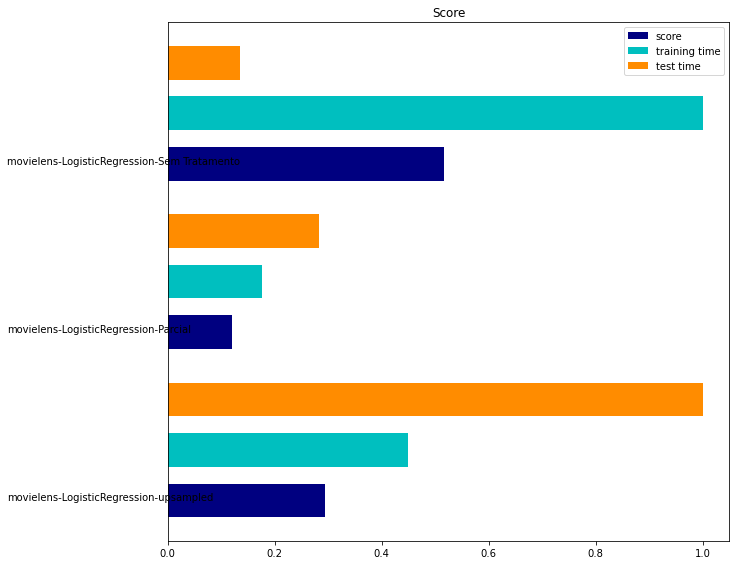

In [146]:
indices = np.arange(len(resultsLogisticRegression))

resultsLogisticRegression = [[x[i] for x in resultsLogisticRegression] for i in range(4)] 
clf_names, score, training_time, test_time = resultsLogisticRegression
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

## SGD Classifier - upsampled


In [147]:
resultsSGDClassifier = []
 

In [148]:
lr  = SGDClassifier(shuffle=True, loss='log', penalty="elasticnet", class_weight = 'balanced')
clf  = OneVsRestClassifier(lr) 
classes=multilabel_binarizer3.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb2, ytrainb2) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb2)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb2, pred, average="micro")
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb2, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens-SGD Classifier-upsampled'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
resultsSGDClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])

________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=SGDClassifier(class_weight='balanced', loss='log',
                                            penalty='elasticnet'))
Treino: 32.323s
testes:  0.131s
accuracy:   0.241

Accuracy: 0.00

Micro Precision: 0.15
Micro Recall: 0.67
Micro F1-score: 0.24

Macro Precision: 0.16
Macro Recall: 0.67
Macro F1-score: 0.25

Weighted Precision: 0.16
Weighted Recall: 0.67
Weighted F1-score: 0.25
Relatório de Classificação:
              precision    recall  f1-score   support

      Action       0.12      0.58      0.20      5086
   Animation       0.19      0.72      0.29      5025
      Comedy       0.10      0.53      0.16      4965
       Crime       0.13      0.65      0.21      5004
 Documentary       0.14      0.65      0.23      4987
       Drama       0.08      0.45      0.13      5066
     Fantasy       0.17      0.72      0.27      

## SGD Classifier - Tratamento Parcial


In [149]:
lr  = SGDClassifier(shuffle=True, loss='log', penalty="elasticnet", class_weight = 'balanced')
clf  = OneVsRestClassifier(lr) 
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb, pred, average="micro")
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens-SGD Classifier - Tratamento Parcial'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time]) 
resultsSGDClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])

________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=SGDClassifier(class_weight='balanced', loss='log',
                                            penalty='elasticnet'))
Treino: 17.749s
testes:  0.047s
accuracy:   0.116

Accuracy: 0.00

Micro Precision: 0.07
Micro Recall: 0.38
Micro F1-score: 0.12

Macro Precision: 0.05
Macro Recall: 0.31
Macro F1-score: 0.09

Weighted Precision: 0.11
Weighted Recall: 0.38
Weighted F1-score: 0.16
Relatório de Classificação:
              precision    recall  f1-score   support

      Action       0.06      0.35      0.11      1412
   Adventure       0.04      0.31      0.07       844
   Animation       0.04      0.34      0.06       568
    Children       0.03      0.31      0.06       614
      Comedy       0.15      0.45      0.23      3255
       Crime       0.04      0.32      0.08      1006
 Documentary       0.06      0.37      0.10      

## SGD Classifier - Sem Tratamento


In [150]:
lr  = SGDClassifier(shuffle=True, loss='log', penalty="elasticnet", class_weight = 'balanced')
clf  = OneVsRestClassifier(lr) 
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb, pred, average="micro")
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens-SGD Classifier - Sem Tratamento'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time]) 
resultsSGDClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])

________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=SGDClassifier(class_weight='balanced', loss='log',
                                            penalty='elasticnet'))
Treino: 16.254s
testes:  0.054s
accuracy:   0.117

Accuracy: 0.00

Micro Precision: 0.07
Micro Recall: 0.39
Micro F1-score: 0.12

Macro Precision: 0.05
Macro Recall: 0.32
Macro F1-score: 0.09

Weighted Precision: 0.11
Weighted Recall: 0.39
Weighted F1-score: 0.16
Relatório de Classificação:
              precision    recall  f1-score   support

      Action       0.06      0.38      0.11      1412
   Adventure       0.04      0.34      0.07       844
   Animation       0.04      0.35      0.06       568
    Children       0.03      0.30      0.06       614
      Comedy       0.15      0.47      0.23      3255
       Crime       0.05      0.35      0.08      1006
 Documentary       0.06      0.38      0.10      

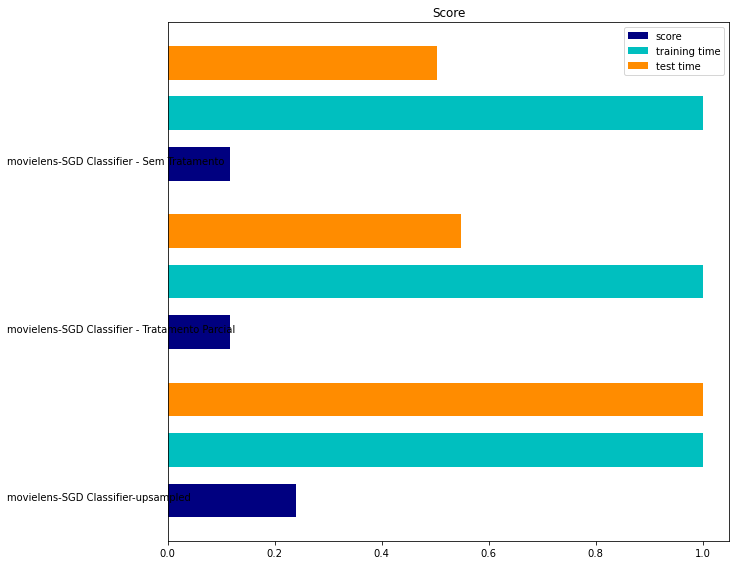

In [151]:
indices = np.arange(len(resultsSGDClassifier))

resultsSGDClassifier = [[x[i] for x in resultsSGDClassifier] for i in range(4)] 
clf_names, score, training_time, test_time = resultsSGDClassifier
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

## Perceptron - upsampled


In [152]:
resultsPerceptron = []


In [153]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# penalty{‘l2’,’l1’,’elasticnet’}
lr  = Perceptron(tol=1e-3, penalty='elasticnet', eta0=0.9)
clf  = OneVsRestClassifier(lr)  
classes=multilabel_binarizer3.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb2, ytrainb2) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb2)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb2, pred, average="micro")
precision = precision_score(yvalb2, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb2, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens-Perceptron - upsampled'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
resultsPerceptron.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=Perceptron(eta0=0.9, penalty='elasticnet'))
Treino: 12.355s
testes:  0.086s
accuracy:   0.140

Accuracy: 0.08

Micro Precision: 0.15
Micro Recall: 0.13
Micro F1-score: 0.14

Macro Precision: 0.16
Macro Recall: 0.13
Macro F1-score: 0.14

Weighted Precision: 0.16
Weighted Recall: 0.13
Weighted F1-score: 0.14
Relatório de Classificação:
              precision    recall  f1-score   support

      Action       0.10      0.13      0.11      5086
   Animation       0.25      0.11      0.15      5025
      Comedy       0.10      0.07      0.08      4965
       Crime       0.12      0.08      0.10      5004
 Documentary       0.11      0.17      0.13      4987
       Drama       0.07      0.07      0.07      5066
     Fantasy       0.18      0.13      0.15      5016
      Horror       0.12      0.13      0.12      4969
     Musical   

## Perceptron - Tratamento Parcial


In [154]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# penalty{‘l2’,’l1’,’elasticnet’}
lr  = Perceptron(tol=1e-3, penalty='elasticnet', eta0=1.5)
clf  = OneVsRestClassifier(lr)  
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb, pred, average="micro")
precision = precision_score(yvalb, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens-Perceptron-Tratamento Parcial'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
resultsPerceptron.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=Perceptron(eta0=1.5, penalty='elasticnet'))
Treino: 4.952s
testes:  0.035s
accuracy:   0.099

Accuracy: 0.05

Micro Precision: 0.10
Micro Recall: 0.10
Micro F1-score: 0.10

Macro Precision: 0.05
Macro Recall: 0.05
Macro F1-score: 0.05

Weighted Precision: 0.11
Weighted Recall: 0.10
Weighted F1-score: 0.10
Relatório de Classificação:
              precision    recall  f1-score   support

      Action       0.07      0.07      0.07      1412
   Adventure       0.04      0.03      0.03       844
   Animation       0.05      0.03      0.04       568
    Children       0.04      0.03      0.04       614
      Comedy       0.15      0.09      0.12      3255
       Crime       0.03      0.02      0.02      1006
 Documentary       0.07      0.02      0.04      1097
       Drama       0.22      0.20      0.21      5030
     Fantasy    

## Perceptron - Sem tratamento

In [155]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# penalty{‘l2’,’l1’,’elasticnet’}
lr  = Perceptron(tol=1e-3, penalty='elasticnet', eta0=1.5)
clf  = OneVsRestClassifier(lr)  
classes=multilabel_binarizer.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidf, ytrain) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidf)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yval, pred, average="micro")
precision = precision_score(yval, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yval, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yval, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yval, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yval, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yval, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yval, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yval, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yval, pred, average='weighted')))

print("movielens-Relatório de Classificação:")
print(classification_report(yval, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens- Perceptron - Sem Tratamento'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
resultsPerceptron.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=Perceptron(eta0=1.5, penalty='elasticnet'))
Treino: 3.083s
testes:  0.022s
accuracy:   0.397

Accuracy: 0.10

Micro Precision: 0.41
Micro Recall: 0.39
Micro F1-score: 0.40

Macro Precision: 0.26
Macro Recall: 0.25
Macro F1-score: 0.25

Weighted Precision: 0.42
Weighted Recall: 0.39
Weighted F1-score: 0.40
movielens-Relatório de Classificação:
                                              precision    recall  f1-score   support

                         Battle Force (1978)       0.00      0.00      0.00         0
                                      Action       0.37      0.28      0.32      1421
                                   Adventure       0.24      0.21      0.23       778
                                   Animation       0.31      0.32      0.32       590
                                    Children       0.24      0

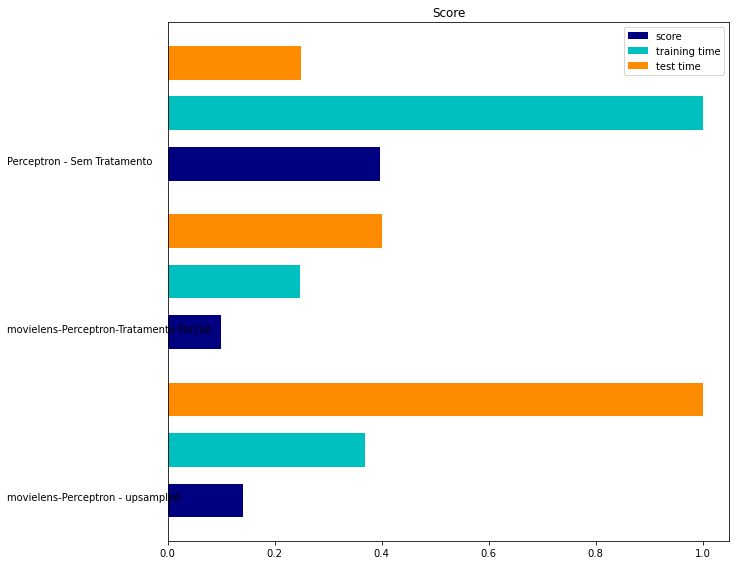

In [156]:
indices = np.arange(len(resultsPerceptron))

resultsPerceptron = [[x[i] for x in resultsPerceptron] for i in range(4)] 
clf_names, score, training_time, test_time = resultsPerceptron
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

## RidgeClassifier -upsampled

In [157]:
resultsRidgeClassifier = []


In [158]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = OneVsRestClassifier(lr)  
classes=multilabel_binarizer3.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb2, ytrainb2) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb2)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb2, pred, average="micro")
precision = precision_score(yvalb2, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb2, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens- RidgeClassifier - upsampled'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])   
resultsRidgeClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=RidgeClassifier(tol=0.01))
Treino: 11.883s
testes:  0.075s
accuracy:   0.025

Accuracy: 0.01

Micro Precision: 0.79
Micro Recall: 0.01
Micro F1-score: 0.03

Macro Precision: 0.39
Macro Recall: 0.01
Macro F1-score: 0.02

Weighted Precision: 0.39
Weighted Recall: 0.01
Weighted F1-score: 0.02
Relatório de Classificação:
              precision    recall  f1-score   support

      Action       0.00      0.00      0.00      5086
   Animation       0.80      0.03      0.05      5025
      Comedy       0.00      0.00      0.00      4965
       Crime       0.00      0.00      0.00      5004
 Documentary       1.00      0.00      0.00      4987
       Drama       0.00      0.00      0.00      5066
     Fantasy       0.69      0.00      0.00      5016
      Horror       0.00      0.00      0.00      4969
     Musical       0.77      0.0

## RidgeClassifier - Tratamento Parcial

In [159]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = OneVsRestClassifier(lr)  
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb, pred, average="micro")
precision = precision_score(yvalb, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens- RidgeClassifier - Tratamento Parcial'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time]) 
resultsRidgeClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=RidgeClassifier(tol=0.01))
Treino: 5.066s
testes:  0.030s
accuracy:   0.002

Accuracy: 0.00

Micro Precision: 0.30
Micro Recall: 0.00
Micro F1-score: 0.00

Macro Precision: 0.02
Macro Recall: 0.00
Macro F1-score: 0.00

Weighted Precision: 0.07
Weighted Recall: 0.00
Weighted F1-score: 0.00
Relatório de Classificação:
              precision    recall  f1-score   support

      Action       0.00      0.00      0.00      1412
   Adventure       0.00      0.00      0.00       844
   Animation       0.00      0.00      0.00       568
    Children       0.00      0.00      0.00       614
      Comedy       0.00      0.00      0.00      3255
       Crime       0.00      0.00      0.00      1006
 Documentary       0.00      0.00      0.00      1097
       Drama       0.31      0.00      0.01      5030
     Fantasy       0.00      0.00

## RidgeClassifier - Sem tratamento

In [160]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = OneVsRestClassifier(lr)  
classes=multilabel_binarizer.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidf, ytrain) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidf)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yval, pred, average="micro")
precision = precision_score(yval, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yval, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yval, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yval, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yval, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yval, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yval, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yval, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yval, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yval, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens- RidgeClassifier - Sem Tratamento '#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
resultsRidgeClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])
 

________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=RidgeClassifier(tol=0.01))
Treino: 2.925s
testes:  0.034s
accuracy:   0.489

Accuracy: 0.24

Micro Precision: 0.69
Micro Recall: 0.38
Micro F1-score: 0.49

Macro Precision: 0.52
Macro Recall: 0.20
Macro F1-score: 0.26

Weighted Precision: 0.68
Weighted Recall: 0.38
Weighted F1-score: 0.46
Relatório de Classificação:
                                              precision    recall  f1-score   support

                         Battle Force (1978)       0.00      0.00      0.00         0
                                      Action       0.67      0.29      0.41      1421
                                   Adventure       0.58      0.12      0.19       778
                                   Animation       0.90      0.20      0.33       590
                                    Children       0.78      0.09      0.17       585
   

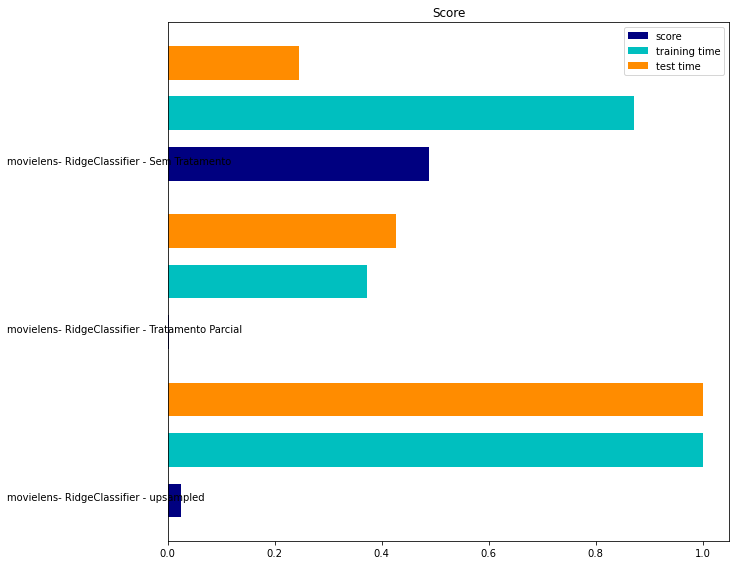

In [161]:
indices = np.arange(len(resultsRidgeClassifier))

resultsRidgeClassifier = [[x[i] for x in resultsRidgeClassifier] for i in range(4)] 
clf_names, score, training_time, test_time = resultsRidgeClassifier
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

## KNeighborsClassifier

In [ ]:
resultsKNeighborsClassifier = []



In [58]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = KNeighborsClassifier(n_neighbors=10)#OneVsRestClassifier(lr)  
classes=multilabel_binarizer3.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb2, ytrainb2) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb2)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb2, pred, average="micro")
precision = precision_score(yvalb2, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb2, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens- KNeighborsClassifier'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
resultsKNeighborsClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=10)
Treino: 0.032s
testes:  12.183s
accuracy:   0.490

Accuracy: 0.37

Micro Precision: 0.71
Micro Recall: 0.37
Micro F1-score: 0.49

Macro Precision: 0.54
Macro Recall: 0.38
Macro F1-score: 0.39

Weighted Precision: 0.54
Weighted Recall: 0.37
Weighted F1-score: 0.39
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.38      0.01      0.03       446
      Animation       0.65      0.50      0.57       452
         Comedy       0.00      0.00      0.00       453
          Crime       0.61      0.05      0.09       481
    Documentary       0.46      0.93      0.62       460
          Drama       0.00      0.00      0.00       466
         Family       0.59      0.07      0.13       468
        Fantasy       0.45      0.15      0.22       453
        Foreign       0.9

## KNeighborsClassifier - Tratamento Parcial

In [59]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = KNeighborsClassifier(n_neighbors=10)#OneVsRestClassifier(lr)  
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb, pred, average="micro")
precision = precision_score(yvalb, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens- KNeighborsClassifier - Tratamento Parcial'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
resultsKNeighborsClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=10)
Treino: 0.010s
testes:  2.094s
accuracy:   0.000

Accuracy: 0.00

Micro Precision: 0.00
Micro Recall: 0.00
Micro F1-score: 0.00

Macro Precision: 0.00
Macro Recall: 0.00
Macro F1-score: 0.00

Weighted Precision: 0.00
Weighted Recall: 0.00
Weighted F1-score: 0.00
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.00      0.00      0.00       241
      Adventure       0.00      0.00      0.00       161
      Animation       0.00      0.00      0.00        55
         Comedy       0.00      0.00      0.00       332
          Crime       0.00      0.00      0.00       142
    Documentary       0.00      0.00      0.00        25
          Drama       0.00      0.00      0.00       475
         Family       0.00      0.00      0.00        95
        Fantasy       0.00

## KNeighborsClassifier - Sem tratamento

In [60]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = KNeighborsClassifier(n_neighbors=10)#OneVsRestClassifier(lr)  
classes=multilabel_binarizer.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidf, ytrain) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidf)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yval, pred, average="micro")
precision = precision_score(yval, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yval, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yval, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yval, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yval, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yval, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yval, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yval, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yval, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yval, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'movielens- KNeighborsClassifier - Tratamento Parcial'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])
resultsKNeighborsClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=10)
Treino: 0.004s
testes:  0.545s
accuracy:   0.141

Accuracy: 0.04

Micro Precision: 0.71
Micro Recall: 0.08
Micro F1-score: 0.14

Macro Precision: 0.22
Macro Recall: 0.03
Macro F1-score: 0.05

Weighted Precision: 0.37
Weighted Recall: 0.08
Weighted F1-score: 0.12
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.62      0.16      0.25       217
      Adventure       0.00      0.00      0.00       146
      Animation       0.00      0.00      0.00        33
         Comedy       0.63      0.04      0.07       331
          Crime       0.50      0.01      0.01       135
    Documentary       1.00      0.04      0.08        24
          Drama       0.73      0.28      0.41       478
         Family       0.00      0.00      0.00        82
        Fantasy       0.00

In [ ]:
indices = np.arange(len(resultsKNeighborsClassifier))

resultsKNeighborsClassifier = [[x[i] for x in resultsKNeighborsClassifier] for i in range(4)] 
clf_names, score, training_time, test_time = resultsKNeighborsClassifier
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

## PassiveAggressiveClassifier

In [ ]:
resultsPassiveAggressiveClassifier = []


In [61]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  =  PassiveAggressiveClassifier(shuffle=True) 
clf = OneVsRestClassifier(lr)  
classes=multilabel_binarizer3.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb2, ytrainb2) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb2)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb2, pred, average="micro")
precision = precision_score(yvalb2, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb2, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'PassiveAggressiveClassifier - upsampled'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])
resultsPassiveAggressiveClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=PassiveAggressiveClassifier())
Treino: 1.448s
testes:  0.011s
accuracy:   0.587

Accuracy: 0.50

Micro Precision: 0.63
Micro Recall: 0.55
Micro F1-score: 0.59

Macro Precision: 0.59
Macro Recall: 0.55
Macro F1-score: 0.56

Weighted Precision: 0.59
Weighted Recall: 0.55
Weighted F1-score: 0.56
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.34      0.22      0.27       446
      Animation       0.65      0.60      0.63       452
         Comedy       0.45      0.21      0.29       453
          Crime       0.48      0.38      0.42       481
    Documentary       0.90      0.88      0.89       460
          Drama       0.22      0.07      0.10       466
         Family       0.46      0.48      0.47       468
        Fantasy       0.51      0.39      0.44       453
  

## PassiveAggressiveClassifier - Tratamento Parcial

In [62]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  =  PassiveAggressiveClassifier(shuffle=True) 
clf = OneVsRestClassifier(lr)  
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb, pred, average="micro")
precision = precision_score(yvalb, pred, average='micro')
print("accuracy:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'PassiveAggressiveClassifier - - Tratamento Parcial'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
resultsPassiveAggressiveClassifier.append([clf_descr, score,precision, train_time, test_time])
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=PassiveAggressiveClassifier())
Treino: 0.353s
testes:  0.006s
accuracy:   0.033

Accuracy: 0.02

Micro Precision: 0.04
Micro Recall: 0.03
Micro F1-score: 0.03

Macro Precision: 0.02
Macro Recall: 0.01
Macro F1-score: 0.02

Weighted Precision: 0.03
Weighted Recall: 0.03
Weighted F1-score: 0.03
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.01      0.00      0.01       241
      Adventure       0.00      0.00      0.00       161
      Animation       0.00      0.00      0.00        55
         Comedy       0.07      0.05      0.06       332
          Crime       0.01      0.01      0.01       142
    Documentary       0.25      0.08      0.12        25
          Drama       0.09      0.09      0.09       475
         Family       0.00      0.00      0.00        95
  

## VotingClassifier

In [63]:
# from sklearn.ensemble import VotingClassifier
# # (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# # lr  = RidgeClassifier(tol=1e-2, solver="auto")   
# # clf  = OneVsRestClassifier(VotingClassifier(estimators=30))  
# clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
# clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
# clf3 = GaussianNB()
# eclf1 = VotingClassifier(estimators=[
# ...         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
# classes=multilabel_binarizer3.classes_ 
# print('_' * 120)
# print("Training: ")
# print(clf)
# t0 = time()
# clf.fit(xtrain_tfidfb2, ytrainb2) 
# train_time = time() - t0
# print("Treino: %0.3fs" % train_time)

# t0 = time()
# pred = clf.predict(xval_tfidfb2)
# test_time = time() - t0
# print("testes:  %0.3fs" % test_time)

# score = f1_score(yvalb2, pred, average="micro")
# precision = precision_score(yvalb2, pred, average='micro')
# print("f1_score:   %0.3f" % score)
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

# print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
# print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
# print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

# print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

# print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
# print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
# print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

# print("Relatório de Classificação:")
# print(classification_report(yvalb2, pred,
# #                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
#                                         target_names=classes))

# # print("confusion matrix:") 
# # print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


# if hasattr(clf, 'coef_'):
#     print("dimensionality: %d" % clf.coef_.shape[1])
#     print("density: %f" % density(clf.coef_))

# clf_descr = 'VotingClassifier - upsampled'#str(clf).split('(')[0]
# results.append([clf_descr, score,precision, train_time, test_time])  
# salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=PassiveAggressiveClassifier())
Treino: 1.587s
testes:  0.011s
f1_score:   0.595

Accuracy: 0.51

Micro Precision: 0.62
Micro Recall: 0.57
Micro F1-score: 0.60

Macro Precision: 0.59
Macro Recall: 0.57
Macro F1-score: 0.58

Weighted Precision: 0.59
Weighted Recall: 0.57
Weighted F1-score: 0.58
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.30      0.17      0.22       446
      Animation       0.60      0.70      0.65       452
         Comedy       0.44      0.24      0.31       453
          Crime       0.51      0.49      0.50       481
    Documentary       0.89      0.90      0.90       460
          Drama       0.22      0.08      0.12       466
         Family       0.47      0.46      0.47       468
        Fantasy       0.46      0.47      0.47       453
  

In [64]:
# parcial

In [65]:
# from sklearn.ensemble import VotingClassifier
# # (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# # lr  = RidgeClassifier(tol=1e-2, solver="auto")   
# # clf  = OneVsRestClassifier(VotingClassifier(estimators=30))  
# classes=multilabel_binarizer2.classes_ 
# print('_' * 120)
# print("Training: ")
# print(clf)
# t0 = time()
# clf.fit(xtrain_tfidfb, ytrainb) 
# train_time = time() - t0
# print("Treino: %0.3fs" % train_time)

# t0 = time()
# pred = clf.predict(xval_tfidfb)
# test_time = time() - t0
# print("testes:  %0.3fs" % test_time)

# score = f1_score(yvalb, pred, average="micro")
# precision = precision_score(yvalb, pred, average='micro')
# print("f1_score:   %0.3f" % score)
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

# print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
# print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
# print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

# print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

# print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
# print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
# print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

# print("Relatório de Classificação:")
# print(classification_report(yvalb, pred,
# #                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
#                                         target_names=classes))

# # print("confusion matrix:") 
# # print(confusion_matrix(yvalb.argmax(axis=1), pred.argmax(axis=1)))


# if hasattr(clf, 'coef_'):
#     print("dimensionality: %d" % clf.coef_.shape[1])
#     print("density: %f" % density(clf.coef_))


# clf_descr = 'VotingClassifier - tratamento parcial'#str(clf).split('(')[0]
# results.append([clf_descr, score,precision, train_time, test_time])  
# salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=PassiveAggressiveClassifier())
Treino: 0.414s
testes:  0.005s
f1_score:   0.036

Accuracy: 0.02

Micro Precision: 0.05
Micro Recall: 0.03
Micro F1-score: 0.04

Macro Precision: 0.03
Macro Recall: 0.02
Macro F1-score: 0.02

Weighted Precision: 0.04
Weighted Recall: 0.03
Weighted F1-score: 0.03
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.01      0.00      0.01       241
      Adventure       0.00      0.00      0.00       161
      Animation       0.00      0.00      0.00        55
         Comedy       0.08      0.05      0.06       332
          Crime       0.01      0.01      0.01       142
    Documentary       0.40      0.16      0.23        25
          Drama       0.10      0.09      0.10       475
         Family       0.00      0.00      0.00        95
  

In [66]:
# sem trartamento

In [67]:
# from sklearn.ensemble import VotingClassifier
# # (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# # lr  = RidgeClassifier(tol=1e-2, solver="auto")   
# # clf  = OneVsRestClassifier(VotingClassifier(estimators=30))  
# classes=multilabel_binarizer.classes_ 
# print('_' * 120)
# print("Training: ")
# print(clf)
# t0 = time()
# clf.fit(xtrain_tfidf, ytrain) 
# train_time = time() - t0
# print("Treino: %0.3fs" % train_time)

# t0 = time()
# pred = clf.predict(xval_tfidf)
# test_time = time() - t0
# print("testes:  %0.3fs" % test_time)


# score = f1_score(yval, pred, average="micro")
# precision = precision_score(yval, pred, average='micro')
# print("f1_score:   %0.3f" % score)
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yval, pred)))

# print('Micro Precision: {:.2f}'.format(precision_score(yval, pred, average='micro')))
# print('Micro Recall: {:.2f}'.format(recall_score(yval, pred, average='micro')))
# print('Micro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='micro')))

# print('Macro Precision: {:.2f}'.format(precision_score(yval, pred, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(yval, pred, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='macro')))

# print('Weighted Precision: {:.2f}'.format(precision_score(yval, pred, average='weighted')))
# print('Weighted Recall: {:.2f}'.format(recall_score(yval, pred, average='weighted')))
# print('Weighted F1-score: {:.2f}'.format(f1_score(yval, pred, average='weighted')))

# print("Relatório de Classificação:")
# print(classification_report(yval, pred,
# #                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
#                                         target_names=classes))

# # print("confusion matrix:") 
# # print(confusion_matrix(yval.argmax(axis=1), pred.argmax(axis=1)))


# if hasattr(clf, 'coef_'):
#     print("dimensionality: %d" % clf.coef_.shape[1])
#     print("density: %f" % density(clf.coef_))

# clf_descr = 'VotingClassifier - sem tratamento'#str(clf).split('(')[0]
# results.append([clf_descr, score,precision, train_time, test_time])  
# salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=PassiveAggressiveClassifier())
Treino: 0.154s
testes:  0.004s
f1_score:   0.488

Accuracy: 0.08

Micro Precision: 0.53
Micro Recall: 0.45
Micro F1-score: 0.49

Macro Precision: 0.49
Macro Recall: 0.32
Macro F1-score: 0.37

Weighted Precision: 0.53
Weighted Recall: 0.45
Weighted F1-score: 0.48
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.52      0.53      0.52       217
      Adventure       0.42      0.38      0.40       146
      Animation       0.43      0.27      0.33        33
         Comedy       0.53      0.56      0.54       331
          Crime       0.39      0.30      0.34       135
    Documentary       0.70      0.29      0.41        24
          Drama       0.64      0.61      0.62       478
         Family       0.48      0.39      0.43        82
  

## ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  =  ExtraTreesClassifier(n_estimators=20)   
# clf  = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=100))  
classes=multilabel_binarizer3.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb2, ytrainb2) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb2)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb2, pred, average="micro")
precision = precision_score(yvalb2, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb2, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'ExtraTreesClassifier - upsampled'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
ExtraTreesClassifier(n_estimators=20)


## ExtraTreesClassifier -tratamento parcial

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  =  ExtraTreesClassifier(n_estimators=20)   
# clf  = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=100))  
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb, pred, average="micro")
precision = precision_score(yvalb, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'ExtraTreesClassifier - tratamento parcial'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


## ExtraTreesClassifier - sem tratamento

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  =  ExtraTreesClassifier(n_estimators=20)   
# clf  = OneVsRestClassifier(ExtraTreesClassifier(n_estimators=100))  
classes=multilabel_binarizer.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidf, ytrain) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidf)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yval, pred, average="micro")
precision = precision_score(yval, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yval, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yval, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yval, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yval, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yval, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yval, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yval, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yval, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yval, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'ExtraTreesClassifier - sem tratamento'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


## AdaBoostClassifier - upsampled

In [73]:
from sklearn.ensemble import AdaBoostClassifier
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# lr  = RidgeClassifier(tol=1e-2, solver="auto") 

clf  = OneVsRestClassifier(AdaBoostClassifier(n_estimators=30))  
classes=multilabel_binarizer3.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb2, ytrainb2) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb2)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb2, pred, average="micro")
precision = precision_score(yvalb2, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb2, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'AdaBoostClassifier - upsampled'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=AdaBoostClassifier(n_estimators=100))
Treino: 134.543s
testes:  3.125s
f1_score:   0.444

Accuracy: 0.31

Micro Precision: 0.70
Micro Recall: 0.32
Micro F1-score: 0.44

Macro Precision: 0.54
Macro Recall: 0.33
Macro F1-score: 0.37

Weighted Precision: 0.54
Weighted Recall: 0.32
Weighted F1-score: 0.37
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.36      0.06      0.10       446
      Animation       0.51      0.15      0.24       452
         Comedy       0.28      0.03      0.06       453
          Crime       0.46      0.16      0.24       481
    Documentary       0.87      0.91      0.89       460
          Drama       0.08      0.00      0.00       466
         Family       0.37      0.07      0.11       468
        Fantasy       0.41      0.15      0.22    

## AdaBoostClassifier - tratamento Parcial

In [74]:
from sklearn.ensemble import AdaBoostClassifier
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# lr  = RidgeClassifier(tol=1e-2, solver="auto") 

clf  = OneVsRestClassifier(AdaBoostClassifier(n_estimators=30))  
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb, pred, average="micro")
precision = precision_score(yvalb, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'AdaBoostClassifier - tratamento parcial'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=AdaBoostClassifier(n_estimators=100))
Treino: 59.544s
testes:  1.261s
f1_score:   0.060

Accuracy: 0.03

Micro Precision: 0.19
Micro Recall: 0.04
Micro F1-score: 0.06

Macro Precision: 0.15
Macro Recall: 0.03
Macro F1-score: 0.05

Weighted Precision: 0.19
Weighted Recall: 0.04
Weighted F1-score: 0.06
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.14      0.02      0.04       241
      Adventure       0.00      0.00      0.00       161
      Animation       0.00      0.00      0.00        55
         Comedy       0.25      0.05      0.08       332
          Crime       0.15      0.04      0.07       142
    Documentary       0.42      0.20      0.27        25
          Drama       0.33      0.06      0.10       475
         Family       0.00      0.00      0.00     

## AdaBoostClassifier - sem tratamento

In [75]:
from sklearn.ensemble import AdaBoostClassifier
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
# lr  = RidgeClassifier(tol=1e-2, solver="auto") 

clf  = OneVsRestClassifier(AdaBoostClassifier(n_estimators=30))  
classes=multilabel_binarizer.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidf, ytrain) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidf)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yval, pred, average="micro")
precision = precision_score(yval, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yval, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yval, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yval, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yval, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yval, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yval, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yval, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yval, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yval, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yval.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'AdaBoostClassifier - sem tratamento'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=AdaBoostClassifier(n_estimators=100))
Treino: 18.757s
testes:  0.709s
f1_score:   0.452

Accuracy: 0.08

Micro Precision: 0.55
Micro Recall: 0.38
Micro F1-score: 0.45

Macro Precision: 0.44
Macro Recall: 0.25
Macro F1-score: 0.31

Weighted Precision: 0.53
Weighted Recall: 0.38
Weighted F1-score: 0.44
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.55      0.37      0.45       217
      Adventure       0.48      0.29      0.36       146
      Animation       0.32      0.21      0.25        33
         Comedy       0.58      0.51      0.54       331
          Crime       0.47      0.30      0.37       135
    Documentary       0.50      0.12      0.20        24
          Drama       0.64      0.59      0.61       478
         Family       0.41      0.23      0.30     

## GradientBoostingClassifier - upsampled

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=20))  
classes=multilabel_binarizer3.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb2, ytrainb2) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb2)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb2, pred, average="micro")
precision = precision_score(yvalb2, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb2, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'GradientBoostingClassifier - upsampled'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])   
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=GradientBoostingClassifier(n_estimators=50))
Treino: 128.733s
testes:  0.094s
f1_score:   0.294

Accuracy: 0.18

Micro Precision: 0.88
Micro Recall: 0.18
Micro F1-score: 0.29

Macro Precision: 0.69
Macro Recall: 0.18
Macro F1-score: 0.23

Weighted Precision: 0.69
Weighted Recall: 0.18
Weighted F1-score: 0.23
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.40      0.01      0.03       446
      Animation       0.71      0.03      0.05       452
         Comedy       0.00      0.00      0.00       453
          Crime       0.61      0.03      0.06       481
    Documentary       0.91      0.47      0.61       460
          Drama       1.00      0.00      0.00       466
         Family       0.73      0.02      0.03       468
        Fantasy       0.73      0.04      0

## GradientBoostingClassifier - Tratamento Parcial

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=20))  
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb, pred, average="micro")
precision = precision_score(yvalb, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'GradientBoostingClassifier - Tratamento Parcial'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])   
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=GradientBoostingClassifier())
Treino: 124.876s
testes:  0.060s
f1_score:   0.005

Accuracy: 0.00

Micro Precision: 0.03
Micro Recall: 0.00
Micro F1-score: 0.01

Macro Precision: 0.02
Macro Recall: 0.01
Macro F1-score: 0.01

Weighted Precision: 0.04
Weighted Recall: 0.00
Weighted F1-score: 0.00
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.00      0.00      0.00       241
      Adventure       0.00      0.00      0.00       161
      Animation       0.00      0.00      0.00        55
         Comedy       0.00      0.00      0.00       332
          Crime       0.00      0.00      0.00       142
    Documentary       0.10      0.04      0.06        25
          Drama       0.19      0.01      0.02       475
         Family       0.00      0.00      0.00        95
 

## GradientBoostingClassifier - sem tratamento

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=20))  
classes=multilabel_binarizer.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidf, ytrain) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidf)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yval, pred, average="micro")
precision = precision_score(yval, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yval, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yval, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yval, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yval, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yval, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yval, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yval, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yval, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yval, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'GradientBoostingClassifier  - sem tratamento'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])   
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
OneVsRestClassifier(estimator=GradientBoostingClassifier())
Treino: 37.130s
testes:  0.022s
f1_score:   0.375

Accuracy: 0.08

Micro Precision: 0.66
Micro Recall: 0.26
Micro F1-score: 0.37

Macro Precision: 0.53
Macro Recall: 0.19
Macro F1-score: 0.26

Weighted Precision: 0.66
Weighted Recall: 0.26
Weighted F1-score: 0.36
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.67      0.21      0.32       217
      Adventure       0.75      0.10      0.18       146
      Animation       0.88      0.21      0.34        33
         Comedy       0.76      0.29      0.42       331
          Crime       0.64      0.24      0.35       135
    Documentary       0.42      0.21      0.28        24
          Drama       0.68      0.50      0.57       478
         Family       0.69      0.11      0.19        82
  

## RandomForestClassifier - upsampled

In [79]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = RandomForestClassifier(n_estimators=20)#OneVsRestClassifier(lr)  
classes=multilabel_binarizer3.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb2, ytrainb2) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb2)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb2, pred, average="micro")
precision = precision_score(yvalb2, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb2, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb2, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb2, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb2, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb2, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb2, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb2.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'RandomForestClassifier - upsampled'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
RandomForestClassifier()
Treino: 665.139s
testes:  1.163s
f1_score:   0.605

Accuracy: 0.54

Micro Precision: 0.68
Micro Recall: 0.54
Micro F1-score: 0.61

Macro Precision: 0.61
Macro Recall: 0.54
Macro F1-score: 0.56

Weighted Precision: 0.61
Weighted Recall: 0.54
Weighted F1-score: 0.56
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.35      0.15      0.21       446
      Animation       0.65      0.67      0.66       452
         Comedy       0.50      0.20      0.29       453
          Crime       0.52      0.35      0.42       481
    Documentary       0.88      0.96      0.91       460
          Drama       0.02      0.00      0.00       466
         Family       0.62      0.34      0.44       468
        Fantasy       0.53      0.41      0.46       453
        Foreign       0.92      1.00

## RandomForestClassifier - Tratamento Parcial

In [80]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = RandomForestClassifier(n_estimators=20)#OneVsRestClassifier(lr)  
classes=multilabel_binarizer2.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidfb, ytrainb) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidfb)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)

score = f1_score(yvalb, pred, average="micro")
precision = precision_score(yvalb, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yvalb, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yvalb, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yvalb, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yvalb, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yvalb, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yvalb, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yvalb, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yvalb, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yvalb.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))

clf_descr = 'RandomForestClassifier - Tratamento Parcial'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
RandomForestClassifier()
Treino: 164.347s
testes:  0.351s
f1_score:   0.005

Accuracy: 0.00

Micro Precision: 0.01
Micro Recall: 0.00
Micro F1-score: 0.01

Macro Precision: 0.00
Macro Recall: 0.00
Macro F1-score: 0.00

Weighted Precision: 0.01
Weighted Recall: 0.00
Weighted F1-score: 0.00
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.00      0.00      0.00       241
      Adventure       0.00      0.00      0.00       161
      Animation       0.00      0.00      0.00        55
         Comedy       0.01      0.00      0.00       332
          Crime       0.00      0.00      0.00       142
    Documentary       0.00      0.00      0.00        25
          Drama       0.03      0.02      0.02       475
         Family       0.00      0.00      0.00        95
        Fantasy       0.00      0.00

## RandomForestClassifier - Sem Tratamento

In [81]:
# (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
lr  = RidgeClassifier(tol=1e-2, solver="auto") 
clf  = RandomForestClassifier(n_estimators=20)#OneVsRestClassifier(lr)  
classes=multilabel_binarizer.classes_ 
print('_' * 120)
print("Training: ")
print(clf)
t0 = time()
clf.fit(xtrain_tfidf, ytrain) 
train_time = time() - t0
print("Treino: %0.3fs" % train_time)

t0 = time()
pred = clf.predict(xval_tfidf)
test_time = time() - t0
print("testes:  %0.3fs" % test_time)


score = f1_score(yval, pred, average="micro")
precision = precision_score(yval, pred, average='micro')
print("f1_score:   %0.3f" % score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(yval, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(yval, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(yval, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(yval, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(yval, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(yval, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(yval, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(yval, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(yval, pred, average='weighted')))

print("Relatório de Classificação:")
print(classification_report(yval, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                        target_names=classes))

# print("confusion matrix:") 
# print(confusion_matrix(yval.argmax(axis=1), pred.argmax(axis=1)))


if hasattr(clf, 'coef_'):
    print("dimensionality: %d" % clf.coef_.shape[1])
    print("density: %f" % density(clf.coef_))


clf_descr = 'RandomForestClassifier- Sem Tratamento'#str(clf).split('(')[0]
results.append([clf_descr, score,precision, train_time, test_time])  
salvar_dado([clf_descr, score,precision, train_time, test_time])


________________________________________________________________________________________________________________________
Training: 
RandomForestClassifier()
Treino: 6.142s
testes:  0.152s
f1_score:   0.347

Accuracy: 0.08

Micro Precision: 0.68
Micro Recall: 0.23
Micro F1-score: 0.35

Macro Precision: 0.33
Macro Recall: 0.09
Macro F1-score: 0.12

Weighted Precision: 0.57
Weighted Recall: 0.23
Weighted F1-score: 0.29
Relatório de Classificação:
                 precision    recall  f1-score   support

         Action       0.75      0.20      0.31       217
      Adventure       0.60      0.02      0.04       146
      Animation       0.00      0.00      0.00        33
         Comedy       0.62      0.30      0.40       331
          Crime       0.52      0.10      0.16       135
    Documentary       0.50      0.04      0.08        24
          Drama       0.67      0.65      0.66       478
         Family       0.00      0.00      0.00        82
        Fantasy       0.00      0.00  

In [88]:
results = results[1:]
results

[['LogisticRegression-Parcial',
  0.21157450796626057,
  0.14793577981651376,
  2.0526444911956787,
  0.005983114242553711],
 ['LogisticRegression-Sem Tratamento',
  0.5727810650887574,
  0.5395763656633222,
  0.907604455947876,
  0.003989458084106445],
 ['SGD Classifier-upsampled',
  0.5087825175491536,
  0.5395763656633222,
  3.9324402809143066,
  0.013995170593261719],
 ['SGD Classifier - Tratamento Parcial',
  0.21850460908159786,
  0.5395763656633222,
  1.6944711208343506,
  0.0059816837310791016],
 ['SGD Classifier - Sem Tratamento',
  0.2193900773782431,
  0.5395763656633222,
  1.7788381576538086,
  0.005982160568237305],
 ['Perceptron - upsampled',
  0.47957209514054855,
  0.47642736009044656,
  1.5458650588989258,
  0.010972023010253906],
 ['Perceptron-Tratamento Parcial',
  0.11191489361702128,
  0.11596119929453262,
  0.4967031478881836,
  0.0049860477447509766],
 ['Perceptron - Sem Tratamento',
  0.47643362136684997,
  0.4471065241430151,
  0.24434876441955566,
  0.00398707

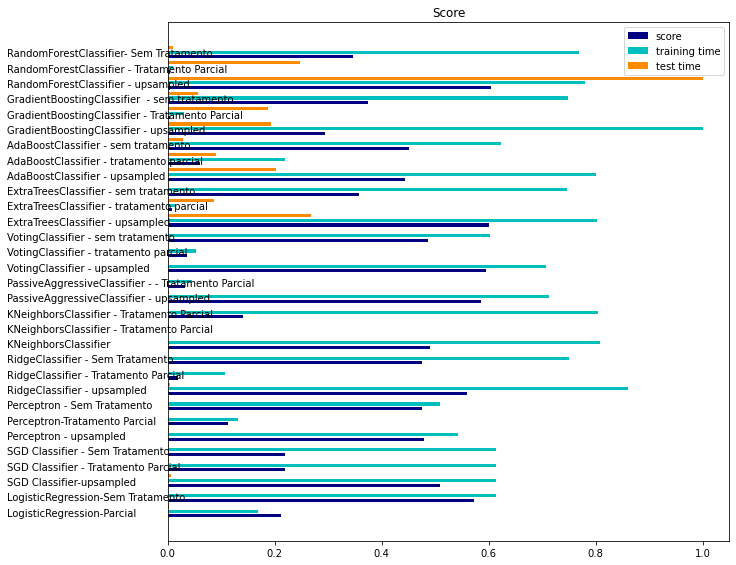

In [89]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

NameError: name 'clf2' is not defined

In [ ]:
from sklearn.utils.extmath import density
from sklearn.metrics import confusion_matrix
def benchmark(clf, xtrain, xval, ytrain, yval,
              print_report=None, 
              print_top10=None, 
              feature_names=None,
              classes=None):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(xtrain, ytrain)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(xval)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = f1_score(yval, pred, average="micro")
    print("accuracy:   %0.3f" % score)
    print("classification report:")
    print(classification_report(yval, pred,
#                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
                                            target_names=classes))
    print("confusion matrix:")
    print(confusion_matrix(yval.argmax(axis=1), pred.argmax(axis=1)))
        
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))
       
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time         

#     if print_report:
#         print("classification report:")
#         print(classification_report(yval, pred,
# #                                             labels=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
#                                             target_names=classes))

#     if opts.print_cm:
#         print("confusion matrix:")
#         print(metrics.confusion_matrix(yval, pred))

#     print()
#     clf_descr = str(clf).split('(')[0]
#     return clf_descr, score, train_time, test_time

In [ ]:
benchmark(clf, xtrain_tfidf, xval_tfidf, ytrain,
          yval,feature_names=tfidf_vectorizer.get_feature_names, 
         classes=multilabel_binarizer.classes_ 
         )

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
results = []
for clf, name in ( 
#         (Perceptron(), "Perceptron"),
#         (PassiveAggressiveClassifier(), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf, xtrain_tfidf, xval_tfidf, ytrain,
          yval,feature_names=tfidf_vectorizer.get_feature_names, 
         classes=multilabel_binarizer.classes_ ))
    

In [ ]:
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, 
                                       penalty="elasticnet"), xtrain_tfidfb2, ytrainb2, xval_tfidfb2,
          yvalb2,feature_names=tfidf_vectorizer.get_feature_names, 
         classes=multilabel_binarizer.classes_ ))

In [ ]:
benchmark(clf2, xtrain_tfidfb, xval_tfidfb, ytrainb,
          yvalb,  
         classes=multilabel_binarizer2.classes_
         )

In [ ]:
benchmark(clf3, xtrain_tfidfb2, xval_tfidfb2, ytrainb2,
          yvalb2,feature_names=tfidf_vectorizer3.get_feature_names, 
         classes= multilabel_binarizer3.classes_ 
         )

In [91]:
def inference(text):
    processed_text = pre_process(text)
    q_vec = tfidf_vectorizer.transform([processed_text])
    q_pred = clf.predict(q_vec) 
    return multilabel_binarizer.inverse_transform(q_pred)
def inference2(text):
    processed_text = pre_process(text)
    q_vec = tfidf_vectorizer2.transform([processed_text])
    q_pred = clf2.predict(q_vec) 
    return multilabel_binarizer2.inverse_transform(q_pred)
def inference3(text):
    processed_text = pre_process(text)
    q_vec = tfidf_vectorizer3.transform([processed_text])
    q_pred = clf3.predict(q_vec) 
    return multilabel_binarizer3.inverse_transform(q_pred)
def CalculateAccuracy(y_test,pred_label):
    nnz = np.shape(y_test)[0] - np.count_nonzero(pred_label - y_test)
    acc = 100*nnz/float(np.shape(y_test)[0])
    return acc

In [ ]:
y_pred3

In [ ]:
CalculateAccuracy(yval, y_pred)

In [ ]:
xval.shape

In [92]:
for i in range(10):
    k = xval.sample(1).index[0]
    print("Movie: ", title_df['title'][k],
          "\nPredicted genre: ", inference(xval[k])
         ), 
    print("Actual genre: ",title_df['genres'][k], "\n")

Movie:  Man Year 
Predicted genre:  [()]
Actual genre:  ['Comedy', 'Drama', 'Romance', 'Thriller'] 

Movie:  Silverado 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Action', 'Crime', 'Drama', 'Western'] 

Movie:  I Spit Your Grave 
Predicted genre:  [('Drama',)]
Actual genre:  ['Thriller', 'Crime', 'Horror'] 

Movie:  Sholem Aleichem Laughing In The Darkness 
Predicted genre:  [('Drama',)]
Actual genre:  ['Documentary'] 

Movie:  Prom Night 
Predicted genre:  [()]
Actual genre:  ['Crime', 'Horror'] 

Movie:  Coach Carter 
Predicted genre:  [('Drama',)]
Actual genre:  ['Drama'] 

Movie:  Mambo Italiano 
Predicted genre:  [('Comedy', 'Drama')]
Actual genre:  ['Comedy', 'Romance'] 

Movie:  Funny Games 
Predicted genre:  [('Drama',)]
Actual genre:  ['Horror', 'Thriller', 'Crime'] 

Movie:  The Longest Ride 
Predicted genre:  [('Drama', 'Romance')]
Actual genre:  ['Drama', 'Romance'] 

Movie:  Shaolin Soccer 
Predicted genre:  [('Drama',)]
Actual genre:  ['Action', 'Comedy'] 



In [ ]:
k = xvalb.sample(1).index[0] 
print(xvalb[k])
processed_text = pre_process(xvalb[k])
processed_text
q_vec = tfidf_vectorizer2.transform([processed_text])
q_vec
q_pred = clf2.predict(q_vec) 
q_pred
y_pred2
multilabel_binarizer3.inverse_transform(y_pred3) [3]
# return multilabel_binarizer2.inverse_transform(q_pred)
print(multilabel_binarizer3.inverse_transform(yvalb2) [3])
print(multilabel_binarizer3.inverse_transform(y_pred3) [3])
# print(inference2(xvalb[k]))

In [93]:
for i in range(10):
    k = xvalb.sample(1).index[0]
    print("Movie: ", filmes_balanceados2['title'][k],
          "\nPredicted genre: ", inference2(xvalb[k])
         ), 
    print("Actual genre: ",filmes_balanceados2['genres'][k], "\n")

NameError: name 'clf2' is not defined

In [94]:
for i in range(10):
    k = xvalb2.sample(1).index[0]
    print("Movie: ", df_upsampled['title'][k],
          "\nPredicted genre: ", inference3(xvalb2[k])
         ), 
    print("Actual genre: ",df_upsampled['genres'][k], "\n")

NameError: name 'clf3' is not defined

In [ ]:
benchmark(clf, xtrain_tfidf, xval_tfidf, ytrain, yval)